## Data Science Academy - Big Data Real-Time Analytics com Python e Spark

## Split - Apply - Combine

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
?pd.read_csv

In [30]:
# parse_dates: alterando o tipo para o tipo Data. usecols: colunas que usaremos
df = pd.read_csv('dataframe_saved_v2.csv', parse_dates = ['Data'], usecols = list(range(0,6)))

In [32]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [33]:
# Ordenando o dataframe pelos índices:
df.sort_index(inplace = True)
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [34]:
df.Minutos.max()

260.71666666666664

In [35]:
df.Distancia.max()

26.2

In [36]:
df.Minutos.min()

6.266666666666667

In [37]:
df.Distancia.min()

0.65

In [38]:
# Da coluna "Distancia", escolho somente os valores maiores que zero e, desses valores, apresento o valor mínimo.
df.Distancia[df.Distancia > 0].min()

0.65

In [39]:
# Contando valores da coluna distancia que são maiores que zero e que estão na posição 0
df.Distancia[df.Distancia > 0].value_counts().index[0]

1.37

Text(0, 0.5, 'Distância')

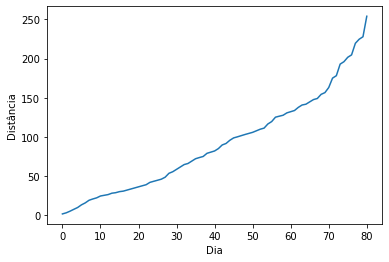

In [40]:
# Cumsum: soma cumulativa
df.Distancia.cumsum().plot()
plt.xlabel("Dia")
plt.ylabel("Distância")

<AxesSubplot:>

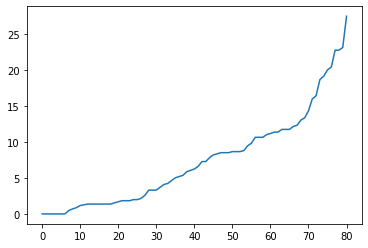

In [41]:
(df.Minutos.fillna(0).cumsum() / 60).plot()

In [42]:
# Extrair info de determinada posição:
df.Data[0].strftime("%A")

'Sunday'

In [43]:
df.Data.map(lambda x: x.strftime("%A")).head()

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

In [44]:
# Criação de coluna "Dia_Semana":
df['Dia_Semana'] = df.Data.map(lambda x: x.strftime("%A"))

In [45]:
df.head(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday
5,2015-08-08,3.40,NaN,NaN,NaN,NaN,Saturday
6,2015-08-09,2.50,NaN,NaN,NaN,NaN,Sunday
7,2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865,Monday
8,2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291,Tuesday
9,2015-08-12,1.42,0:10:35,635.0,10.583333,7.453052,Wednesday


<AxesSubplot:>

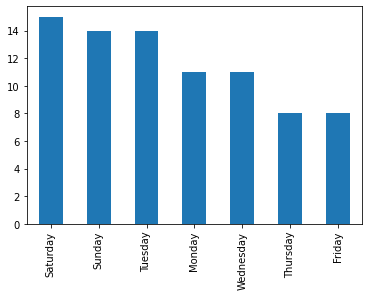

In [46]:
df[df.Distancia > 0].Dia_Semana.value_counts().plot(kind = 'bar')

In [47]:
# Já temos minutos e segundos, podemos deletar a coluna Tempo
del(df['Tempo'])

In [48]:
df.head()

,Data,Distancia,Segundos,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday


In [49]:
# Drop pode ser usado para deletar linhas ou colunas, de acordo com o parâmetro axis (axis = 1: coluna)
df.drop('Segundos', axis = 1)

,Data,Distancia,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,Friday
...,...,...,...,...,...
76,2015-12-24,3.05,25.133333,8.240437,Thursday
77,2015-12-25,14.80,140.000000,9.459459,Friday
78,2015-12-26,5.20,NaN,NaN,Saturday
79,2015-12-30,3.15,22.166667,7.037037,Wednesday


-----------------------------------------------------------------------------------------------------------------------------

In [23]:
#Criando dataframe para exemplos:
tempdf = pd.DataFrame(np.arange(4).reshape(2,2))
tempdf

,0,1
0,0,1
1,2,3


In [24]:
# axis = 0: linha)
tempdf.drop(1, axis = 0)

,0,1
0,0,1


---------------------------------------------------------------------------------------------------------------------

In [50]:
# Visualizar a coluna depois do drop:
df.pop('Segundos')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
       ...   
76     1508.0
77     8400.0
78        NaN
79     1330.0
80    15643.0
Name: Segundos, Length: 81, dtype: float64

In [51]:
for dia in df.Dia_Semana.unique():
    print(dia)
    print(df[df.Dia_Semana == dia])
    break

Sunday
         Data  Distancia     Minutos  Min_Por_Km Dia_Semana
0  2015-08-02       1.70         NaN         NaN     Sunday
6  2015-08-09       2.50         NaN         NaN     Sunday
14 2015-08-16       0.65         NaN         NaN     Sunday
22 2015-08-23       1.34         NaN         NaN     Sunday
42 2015-10-04       4.63   40.000000    8.639309     Sunday
43 2015-10-04       1.87         NaN         NaN     Sunday
44 2015-10-04       4.08   33.000000    8.088235     Sunday
47 2015-10-18       1.50    9.666667    6.444444     Sunday
48 2015-10-18       1.50         NaN         NaN     Sunday
49 2015-10-18       1.37         NaN         NaN     Sunday
51 2015-10-25       2.00         NaN         NaN     Sunday
68 2015-12-13       5.30   43.600000    8.226415     Sunday
69 2015-12-13       2.21   18.983333    8.589744     Sunday
73 2015-12-20      14.80  135.000000    9.121622     Sunday


In [52]:
df['Distancia'] = df.Distancia[df.Distancia > 0]

In [53]:
dias = df.groupby('Dia_Semana')
print(dias)

In [54]:
dias.size()

Dia_Semana
Friday        8
Monday       11
Saturday     15
Sunday       14
Thursday      8
Tuesday      14
Wednesday    11
dtype: int64

In [55]:
dias.count()

,Data,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,,
Friday,8,8,5,5
Monday,11,11,8,8
Saturday,15,15,8,8
Sunday,14,14,6,6
Thursday,8,8,7,7
Tuesday,14,14,10,10
Wednesday,11,11,8,8


In [56]:
dias.mean()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,6.315000,84.530000,8.039543
Monday,2.422727,19.762500,7.463840
Saturday,2.786000,24.308333,7.747657
Sunday,3.246429,46.708333,8.184961
Thursday,3.315000,28.021429,7.829348
Tuesday,2.607143,22.243333,7.463291
Wednesday,2.428182,21.770833,7.659706


In [57]:
dias.sum()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,50.52,422.650000,40.197717
Monday,26.65,158.100000,59.710723
Saturday,41.79,194.466667,61.981259
Sunday,45.45,280.250000,49.109769
Thursday,26.52,196.150000,54.805434
Tuesday,36.50,222.433333,74.632908
Wednesday,26.71,174.166667,61.277645


In [58]:
dias.describe()

Distancia                                                          \
               count      mean       std   min     25%    50%     75%    max   
Dia_Semana                                                                     
Friday           8.0  6.315000  9.300811  0.90  0.9750  1.835  5.9875  26.20   
Monday          11.0  2.422727  1.000241  1.34  1.4500  3.000  3.0500   4.03   
Saturday        15.0  2.786000  1.510718  1.20  1.3700  3.000  3.2500   5.63   
Sunday          14.0  3.246429  3.592504  0.65  1.5000  1.935  3.6850  14.80   
Thursday         8.0  3.315000  3.562291  1.37  1.4675  2.365  2.6375  12.00   
Tuesday         14.0  2.607143  1.688538  0.65  1.4025  1.885  3.0875   6.50   
Wednesday       11.0  2.428182  1.321990  1.37  1.3700  2.000  3.0500   5.63   

           Minutos             ...                         Min_Por_Km  \
             count       mean  ...         75%         max      count   
Dia_Semana                     ...                                      
Friday         5.0  84.530000  ...  140.000000  260.716667        5.0   
Monday         8.0  19.762500  ...   24.116667   30.366667        8.0   
Saturday       8.0  24.308333  ...   30.550000   49.083333        8.0   
Sunday         6.0  46.708333  ...   42.700000  135.000000        6.0   
Thursday       7.0  28.021429  ...   25.066667   99.000000        7.0   
Tuesday       10.0  22.243333  ...   26.795833   58.716667       10.0   
Wednesday      8.0  21.770833  ...   23.350000   51.833333        8.0   

                                                                        \
                mean       std       min       25%       50%       75%   
Dia_Semana                                                               
Friday      8.039543  1.531027  6.861314  6.962963  6.962963  9.459459   
Monday      7.463840  0.578829  6.362530  7.408470  7.474317  7.533788   
Saturday    7.747657  0.844590  6.630170  7.025547  7.803279  8.523306   
Sunday      8.184961  0.926076  6.444444  8.122780  8.408079  8.626918   
Thursday    7.829348  1.142713  6.532847  7.185401  7.411348  8.245219   
Tuesday     7.463291  1.037698  6.000000  6.677835  7.520672  7.815719   
Wednesday   7.659706  0.830158  6.630170  7.218276  7.464231  7.881281   

                       
                  max  
Dia_Semana             
Friday       9.951018  
Monday       8.516865  
Saturday     8.718176  
Sunday       9.121622  
Thursday    10.000000  
Tuesday      9.033333  
Wednesday    9.206631  

[7 rows x 24 columns]

In [59]:
df.groupby('Dia_Semana').mean()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,6.315000,84.530000,8.039543
Monday,2.422727,19.762500,7.463840
Saturday,2.786000,24.308333,7.747657
Sunday,3.246429,46.708333,8.184961
Thursday,3.315000,28.021429,7.829348
Tuesday,2.607143,22.243333,7.463291
Wednesday,2.428182,21.770833,7.659706


In [60]:
df.groupby('Dia_Semana').std()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,9.300811,114.032318,1.531027
Monday,1.000241,8.282836,0.578829
Saturday,1.510718,15.376198,0.844590
Sunday,3.592504,45.119311,0.926076
Thursday,3.562291,32.039394,1.142713
Tuesday,1.688538,16.318699,1.037698
Wednesday,1.321990,13.777549,0.830158


In [61]:
for name, group in dias:
    print(name)
    print(group)

Friday
         Data  Distancia     Minutos  Min_Por_Km Dia_Semana
4  2015-08-07       2.30         NaN         NaN     Friday
11 2015-08-14       0.90    6.266667    6.962963     Friday
12 2015-08-14       0.90    6.266667    6.962963     Friday
20 2015-08-21       1.37    9.400000    6.861314     Friday
30 2015-09-04       3.05         NaN         NaN     Friday
64 2015-11-27       1.00         NaN         NaN     Friday
77 2015-12-25      14.80  140.000000    9.459459     Friday
80 2016-01-01      26.20  260.716667    9.951018     Friday
Monday
         Data  Distancia    Minutos  Min_Por_Km Dia_Semana
1  2015-08-03       1.40        NaN         NaN     Monday
7  2015-08-10       3.36  28.616667    8.516865     Monday
15 2015-08-17       1.34        NaN         NaN     Monday
23 2015-08-24       3.00        NaN         NaN     Monday
38 2015-09-21       4.03  30.366667    7.535153     Monday
39 2015-09-28       1.50  11.300000    7.533333     Monday
40 2015-09-28       1.50  11.3000

In [62]:
dias.get_group('Friday')

,Data,Distancia,Minutos,Min_Por_Km,Dia_Semana
4,2015-08-07,2.30,NaN,NaN,Friday
11,2015-08-14,0.90,6.266667,6.962963,Friday
12,2015-08-14,0.90,6.266667,6.962963,Friday
20,2015-08-21,1.37,9.400000,6.861314,Friday
30,2015-09-04,3.05,NaN,NaN,Friday
64,2015-11-27,1.00,NaN,NaN,Friday
77,2015-12-25,14.80,140.000000,9.459459,Friday
80,2016-01-01,26.20,260.716667,9.951018,Friday


In [63]:
dias.agg(lambda x: len(x))['Distancia']

Dia_Semana
Friday        8.0
Monday       11.0
Saturday     15.0
Sunday       14.0
Thursday      8.0
Tuesday      14.0
Wednesday    11.0
Name: Distancia, dtype: float64

In [64]:
df['Count'] = 1
df.head(10)

,Data,Distancia,Minutos,Min_Por_Km,Dia_Semana,Count
0,2015-08-02,1.70,NaN,NaN,Sunday,1
1,2015-08-03,1.40,NaN,NaN,Monday,1
2,2015-08-04,2.10,NaN,NaN,Tuesday,1
3,2015-08-06,2.38,NaN,NaN,Thursday,1
4,2015-08-07,2.30,NaN,NaN,Friday,1
5,2015-08-08,3.40,NaN,NaN,Saturday,1
6,2015-08-09,2.50,NaN,NaN,Sunday,1
7,2015-08-10,3.36,28.616667,8.516865,Monday,1
8,2015-08-11,1.67,13.116667,7.854291,Tuesday,1
9,2015-08-12,1.42,10.583333,7.453052,Wednesday,1


In [65]:
df.groupby('Dia_Semana').sum()

,Distancia,Minutos,Min_Por_Km,Count
Dia_Semana,,,,
Friday,50.52,422.650000,40.197717,8
Monday,26.65,158.100000,59.710723,11
Saturday,41.79,194.466667,61.981259,15
Sunday,45.45,280.250000,49.109769,14
Thursday,26.52,196.150000,54.805434,8
Tuesday,36.50,222.433333,74.632908,14
Wednesday,26.71,174.166667,61.277645,11
